# Relatório de Análise VII

## Identificando e Removendo Outliers

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure',figsize = (14,6))

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.500000,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.000000,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.333333,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.666667,Apartamento
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,17.142857,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.000000,Apartamento
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.333333,Casa
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.384615,Casa
8,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0,33.333333,Apartamento
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.428571,Apartamento


In [4]:
valor = dados['Valor']

In [5]:
q1 = valor.quantile(.25)

In [6]:
q3 = valor.quantile(.75)

In [10]:
iiq = q3 - q1

In [11]:
limite_inferior = q1 - 1.5 * iiq
limite_superior = q3 + 1.5 * iiq

In [12]:
selecao = (valor < limite_superior) & (valor > limite_inferior)

<AxesSubplot:>

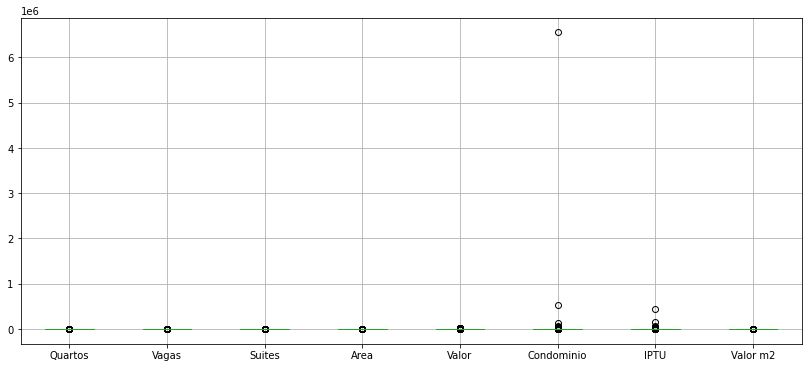

In [13]:
dados_new = dados[selecao]
dados_new.boxplot()

<AxesSubplot:>

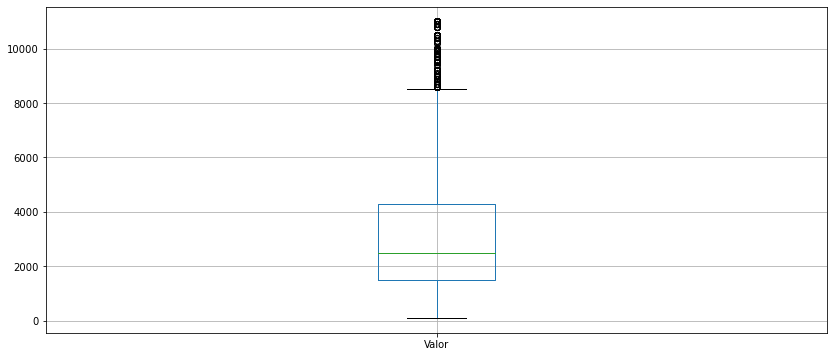

In [14]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

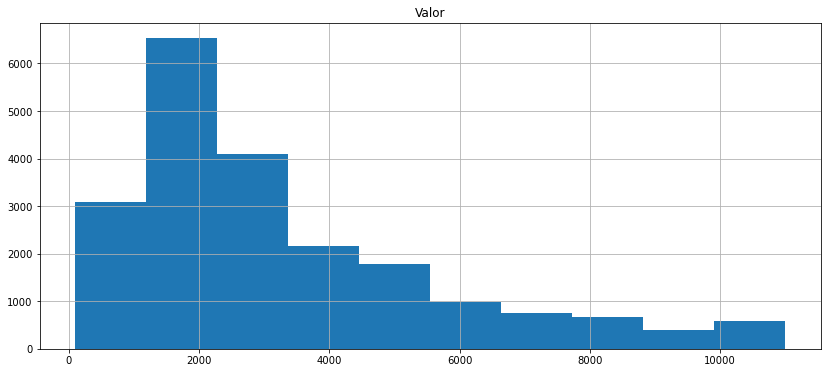

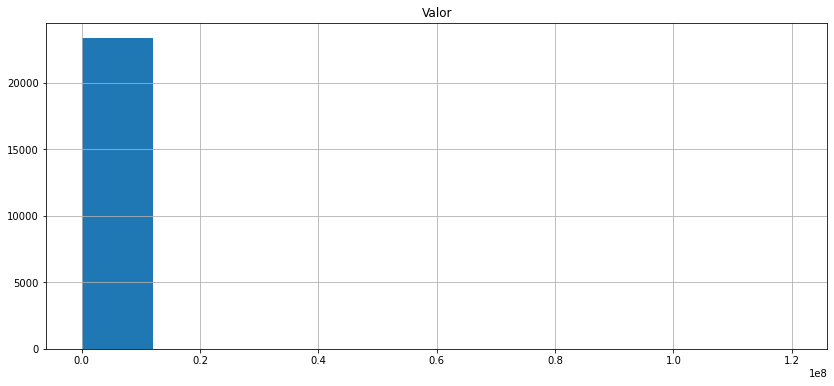

In [15]:
dados_new.hist(['Valor'])
dados.hist(['Valor'])

<AxesSubplot:>

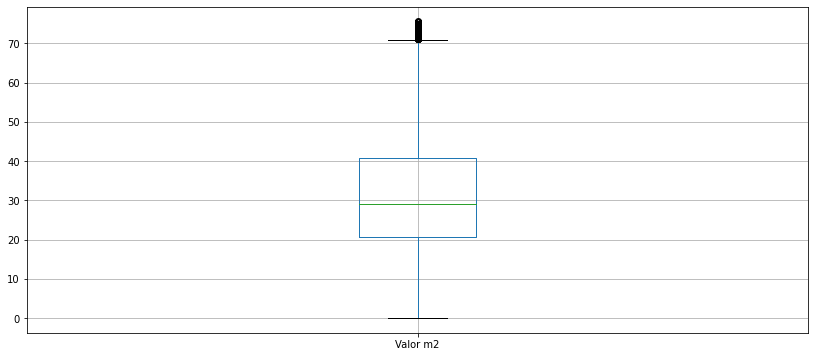

In [17]:
valor_m2 = dados['Valor m2']
q1_m2 = valor_m2.quantile(.25)
q1_m2
q3_m2 = valor_m2.quantile(.75)
q3_m2
iiq_m2 = q3_m2 - q1_m2
iiq_m2
limite_inferior_m2 = q1_m2 - 1.5 * iiq_m2
limite_inferior_m2
limite_superior_m2 = q3_m2 + 1.5 * iiq_m2
limite_superior_m2
selecao = (valor_m2 >= limite_inferior_m2) & (valor_m2 <= limite_superior_m2)
dados_new1 = dados[selecao]
dados_new1.boxplot(['Valor m2'])

In [18]:
q1_m2

21.05263157894737

## Identificando e removendo outliers (continuação)

In [19]:
grupo_tipo = dados.groupby('Tipo')['Valor']
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 5, 8, 9, 10, 11, 13, 17, 18, 19, 21, 22, 24, 25, 26, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 84, 85, 86, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, ...], 'Casa': [1, 27, 59, 62, 102, 106, 154, 170, 192, 255, 267, 270, 281, 305, 329, 335, 353, 359, 377, 398, 405, 419, 445, 455, 496, 497, 503, 537, 570, 571, 596, 600, 601, 649, 652, 661, 667, 668, 694, 711, 735, 756, 760, 796, 807, 818, 897, 915, 983, 1033, 1082, 1090, 1176, 1181, 1183, 1217, 1239, 1315, 1322, 1386, 1405, 1420, 1443, 1488, 1502, 1506, 1519, 1524, 1552, 1555, 1569, 1671, 1691, 1748, 1754, 1758, 1765, 1778, 1805, 1813, 1861, 1914, 1939, 1980, 2011, 2041, 2050, 2068, 2134, 2154, 2171, 2191, 2219, 2225, 2226, 2253, 2292, 2325, 2328, 2335, ...], 'C

In [20]:
q1 = grupo_tipo.quantile(.25)
q3 = grupo_tipo.quantile(.75)
iiq = q3 - q1
limite_inferior = q1 - 1.5 * iiq
limite_superior = q3 + 1.5 * iiq

In [21]:
q1

Tipo
Apartamento            1600.0
Casa                   1100.0
Casa de Condomínio     4000.0
Casa de Vila            750.0
Chácara                4900.0
Flat                   2500.0
Prédio Inteiro        14900.0
Quitinete               900.0
Studio                 1500.0
Sítio                  9750.0
Name: Valor, dtype: float64

In [22]:
q1['Apartamento']

1600.0

In [23]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

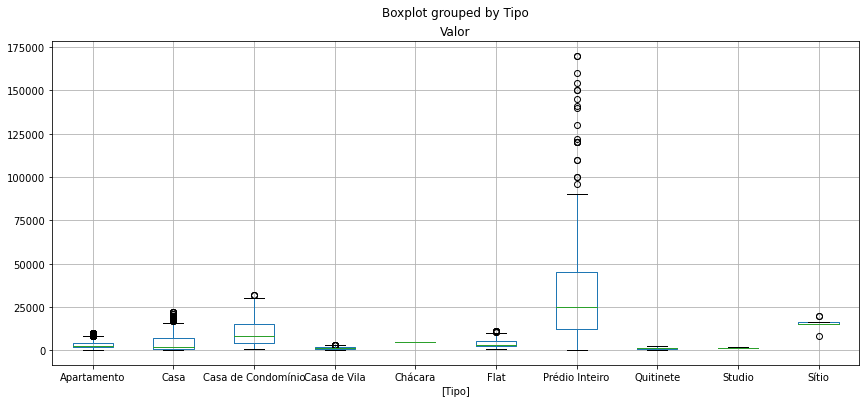

In [24]:
dados_new.boxplot(['Valor'], by= ['Tipo'])

In [25]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep=';', index=False)